In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
# print current work directory
#%pwd

In [4]:
# import dataset
df = pd.read_csv("HDB_resale_price.csv")

In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
# to check for missing values
100*df.isnull().sum()/len(df)

month                  0.0
town                   0.0
flat_type              0.0
block                  0.0
street_name            0.0
storey_range           0.0
floor_area_sqm         0.0
flat_model             0.0
lease_commence_date    0.0
remaining_lease        0.0
resale_price           0.0
dtype: float64

In [7]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [8]:
duplicates # there are 294 duplicated rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0
...,...,...,...,...,...,...,...,...,...,...,...
187510,2024-08,PUNGGOL,4 ROOM,220B,SUMANG LANE,07 TO 09,93.0,Model A,2018,93 years 05 months,645000.0
187726,2024-08,SEMBAWANG,4 ROOM,508C,WELLINGTON CIRCLE,07 TO 09,85.0,Model A,2004,79 years 01 month,520000.0
190108,2024-09,SENGKANG,3 ROOM,471C,FERNVALE ST,01 TO 03,68.0,Model A,2016,91 years 01 month,475000.0
192283,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0


In [9]:
# to remove all duplicated rows
df.drop_duplicates(inplace=True)

In [10]:
# to check data types
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 193876 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                193876 non-null  object 
 1   town                 193876 non-null  object 
 2   flat_type            193876 non-null  object 
 3   block                193876 non-null  object 
 4   street_name          193876 non-null  object 
 5   storey_range         193876 non-null  object 
 6   floor_area_sqm       193876 non-null  float64
 7   flat_model           193876 non-null  object 
 8   lease_commence_date  193876 non-null  int64  
 9   remaining_lease      193876 non-null  object 
 10  resale_price         193876 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.7+ MB


(193876, 11)

C:\Users\miche\AppData\Local\Temp\ipykernel_1284\2571956964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df, x='flat_type', palette='hls')


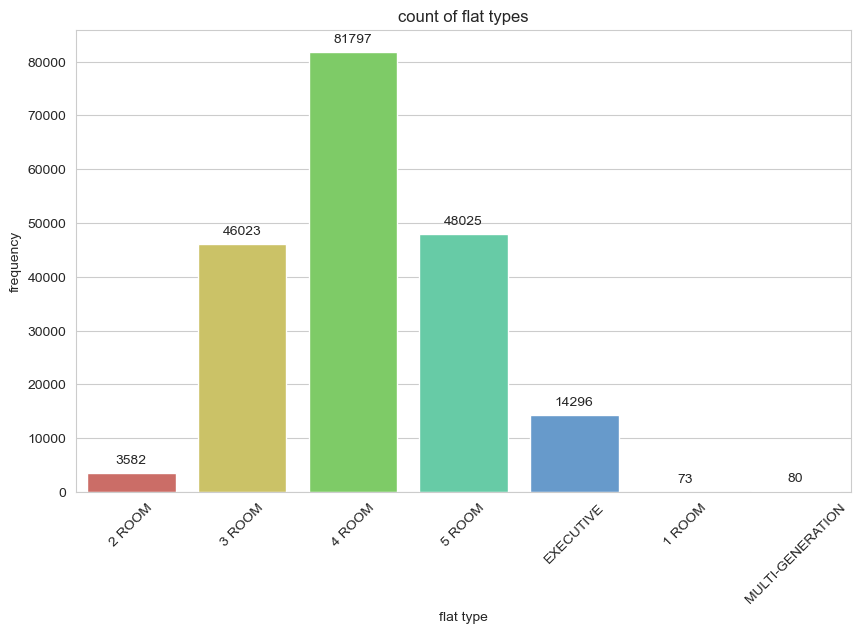

In [11]:
# Exploratory data analysis phase

# bar chart with annotations
plt.figure(figsize=(10,6), dpi=100)
count_plot = sns.countplot(data=df, x='flat_type', palette='hls')
plt.title('count of flat types')
plt.xlabel('flat type')
plt.ylabel('frequency')
plt.xticks(rotation=45)

# Annotate the bars with frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va='center',
                        xytext = (0, 9),
                        textcoords = 'offset points')

plt.show()

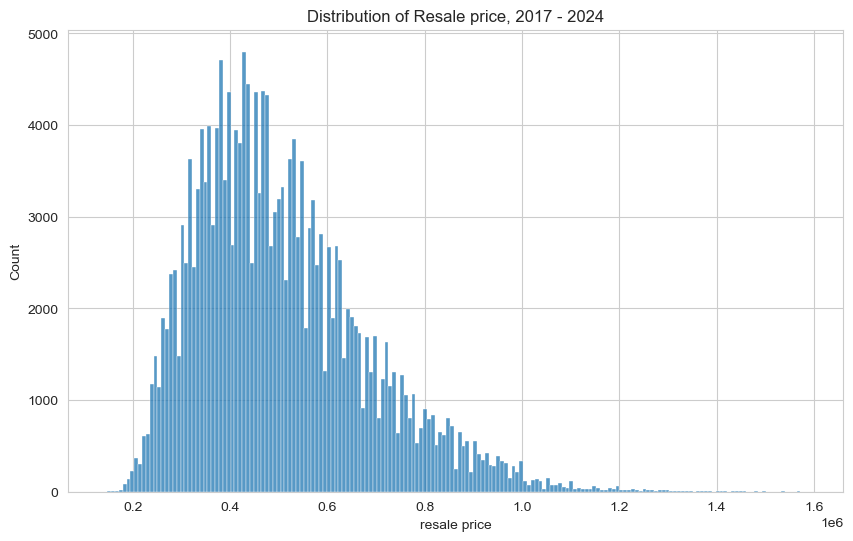

In [12]:
# plot an histogram of resale price
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(data=df, x='resale_price')
plt.title('Distribution of Resale price, 2017 - 2024')
plt.xlabel('resale price');

In [13]:
# Feature engineering, to convert month column to datetime format
df['month'] = pd.to_datetime(df['month'])

In [14]:
# extract 'Year' and 'Month' from column
df['year'] = df['month'].dt.year
df['Month'] = df['month'].dt.month

In [15]:
# to remove redundant column after feature engineering
df = df.drop('month', axis=1)

In [16]:
df['remaining_lease'].value_counts()

remaining_lease
94 years 10 months    1706
94 years 09 months    1700
94 years 11 months    1677
94 years 08 months    1556
94 years 07 months    1465
                      ... 
97 years 01 month        1
93 years 0 months        1
95 years 0 months        1
66 years 0 months        1
97 years 07 months       1
Name: count, Length: 680, dtype: int64

In [17]:
# to convert 'remaining_lease' into 'int'/'float' variable
df['remaining_lease'] = (pd.to_numeric(df['remaining_lease'].str.extractall(r'(\d+)')[0])
                         .unstack().div([1,12]).sum(axis= 1)
                         .round(2))

In [18]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,Month
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61.33,232000.0,2017,1
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60.58,250000.0,2017,1
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62.42,262000.0,2017,1
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62.08,265000.0,2017,1
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62.42,265000.0,2017,1


C:\Users\miche\AppData\Local\Temp\ipykernel_1284\3360638944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='resale_price', palette='bright')


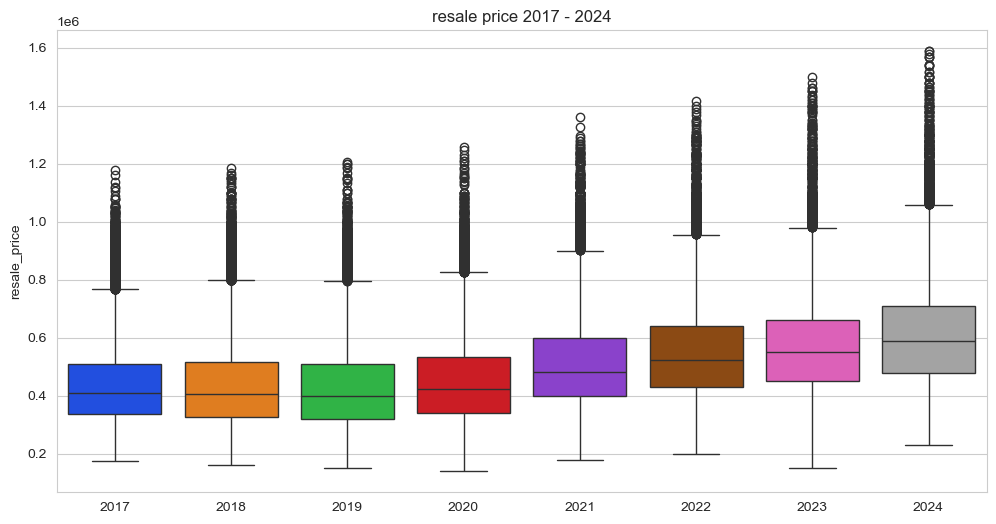

In [19]:
# HDB resale price over the years
plt.figure(figsize=(12,6), dpi=100)
sns.boxplot(data=df, x='year', y='resale_price', palette='bright')
plt.title('resale price 2017 - 2024')
plt.xlabel('');

In [20]:
pd.DataFrame(df.groupby('year')['resale_price'].median())

,resale_price
year,
2017,410000.0
2018,408000.0
2019,400000.0
2020,425000.0
2021,483000.0
2022,525000.0
2023,550000.0
2024,588000.0


In [21]:
# to convert the storey of HDB flat into an ordinal scale numeric values
def convert_storey_range(storey_range: str)-> float:
    """
    Converts a storey range string into its average numerical value.

    The function takes a storey range in the format 'XX TO YY', splits it into 2 parts, 
    converts these parts to integers and returns the average of these integers.

    Args:
        storey_range (str): A string representing a range of storeys, in the format 'XX To YY'.

    Returns:
        float: The average value of the 2 storeys in the range.

    Example:
        convert_storey_range('07 to 09') -> 8.0
    """
    range_values = storey_range.split(' TO ')
    return (int(range_values[0]) + int(range_values[1]))/2

In [22]:
# .apply() method to storey range
df['storey_range'] = df['storey_range'].apply(convert_storey_range)

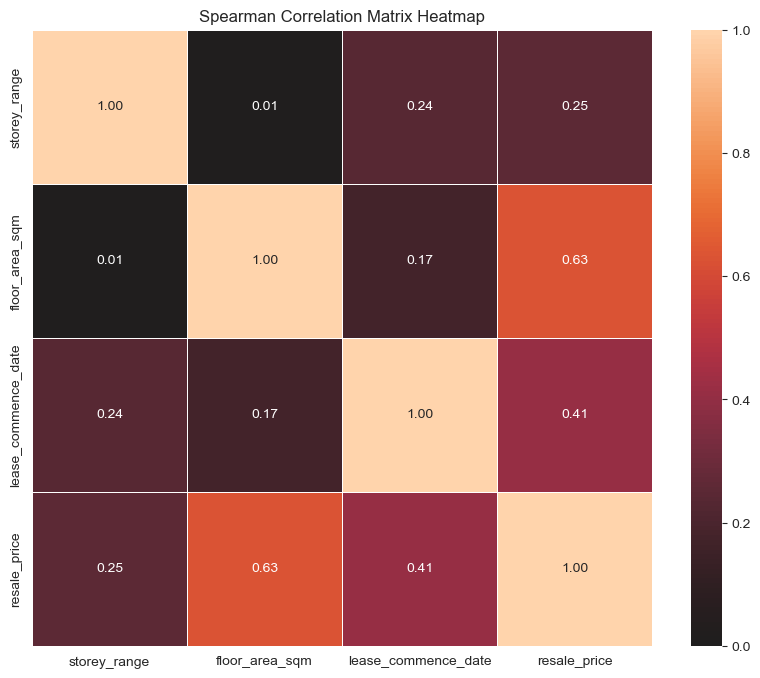

In [23]:
# to select relevant column for analysis, numeric variables
spearman_vars = df[['storey_range','floor_area_sqm','lease_commence_date','resale_price']]

# compute the Spearman correlation matrix
spearman_corr = spearman_vars.corr(method= 'spearman')

# plot the heatmap
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(spearman_corr, annot=True, center=0, vmin=0, vmax=1, linewidth=0.5, fmt=".2f")
plt.title('Spearman Correlation Matrix Heatmap');

In [24]:
# print storey range
df['storey_range'].unique()

array([11.,  2.,  5.,  8., 14., 20., 23., 17., 35., 29., 38., 50., 26.,
       41., 32., 47., 44.])

In [25]:
# to filter to year = 2024
df2 = df[df['year']== 2024]

In [26]:
df2.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,Month
169151,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,8.0,44.0,Improved,1978,53.50,288000.0,2024,1
169152,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5.0,44.0,Improved,1980,55.58,322500.0,2024,1
169153,ANG MO KIO,3 ROOM,308B,ANG MO KIO AVE 1,2.0,70.0,Model A,2012,87.75,520000.0,2024,1
169154,ANG MO KIO,3 ROOM,308B,ANG MO KIO AVE 1,26.0,70.0,Model A,2012,87.75,650000.0,2024,1
169155,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,5.0,67.0,New Generation,1978,53.08,343800.0,2024,1


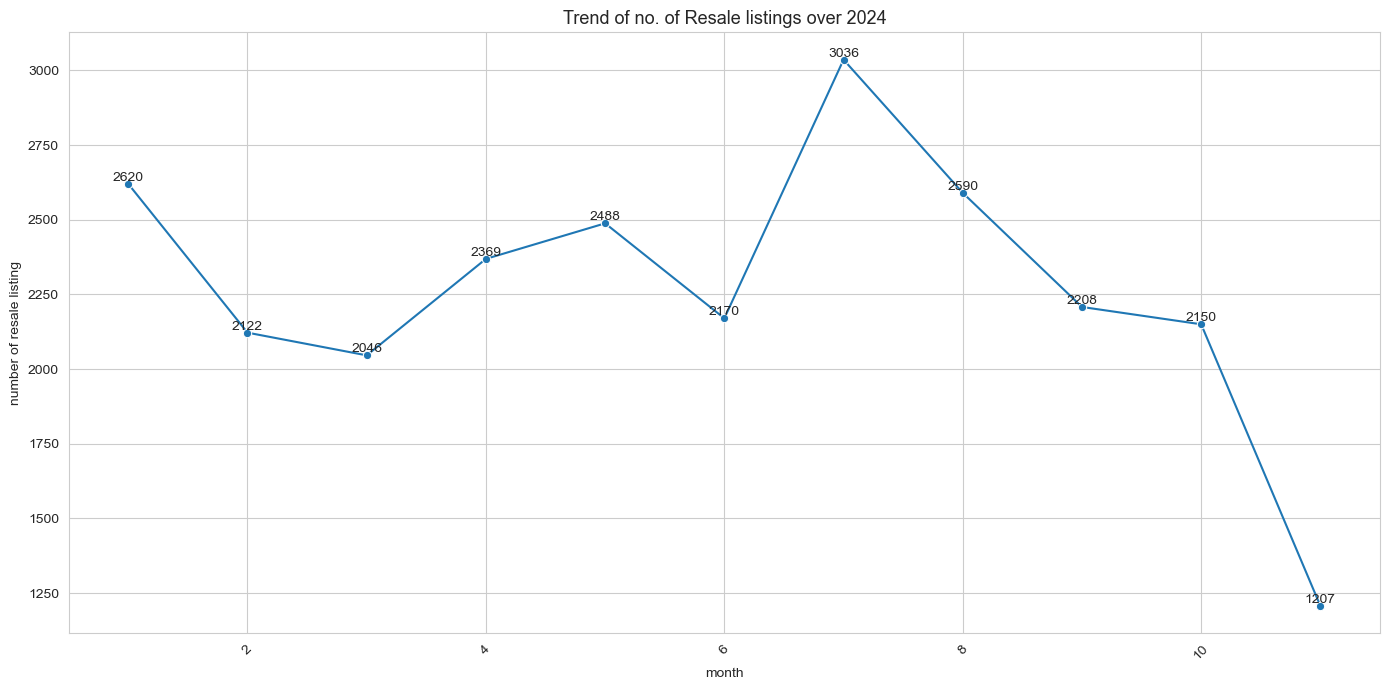

In [27]:
# to view the number of listings per month in year 2024
month_counts = df2['Month'].value_counts().sort_index()

# to create a line chart
plt.figure(figsize=(14,7), dpi=100)
line_plot = sns.lineplot(x= month_counts.index, y= month_counts.values, marker='o')

# to annotate the data points
for x, y in zip(month_counts.index, month_counts.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# July 2024 has the most listings for HDB flats
# to label the chart
plt.title('Trend of no. of Resale listings over 2024', fontsize=13)
plt.xlabel('month')
plt.ylabel('number of resale listing')
plt.xticks(rotation= 45)
plt.tight_layout();

C:\Users\miche\AppData\Local\Temp\ipykernel_1284\517029603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df2, y='resale_price', x='flat_type', palette='bright')


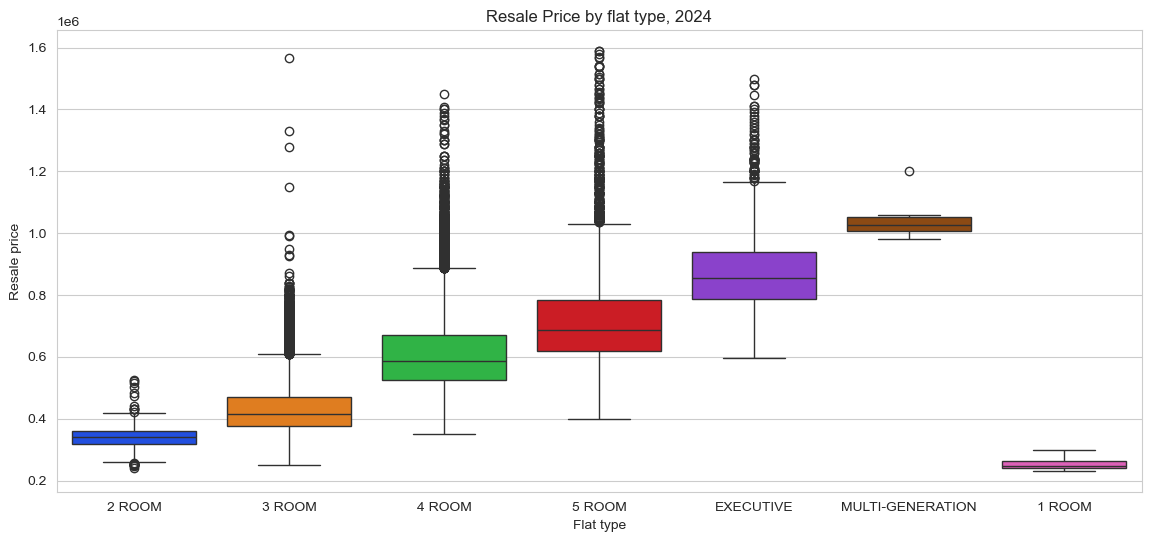

In [28]:
# Resale price by Flat type, 2024
plt.figure(figsize=(14,6), dpi=100)
sns.boxplot(data= df2, y='resale_price', x='flat_type', palette='bright')
plt.title('Resale Price by flat type, 2024')
plt.xlabel('Flat type')
plt.ylabel('Resale price');

C:\Users\miche\AppData\Local\Temp\ipykernel_1284\2740167548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df2, y='town', order= sorted_town_id, palette='Spectral')


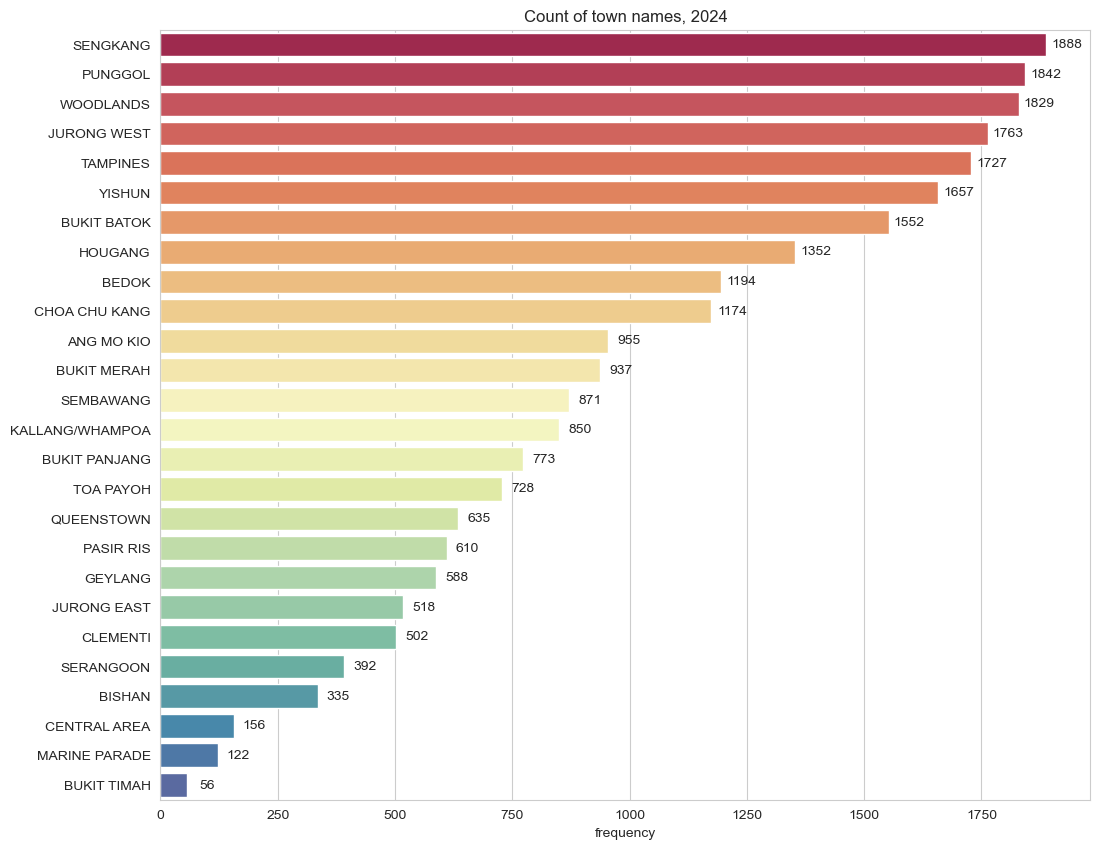

In [29]:
# to sort the town name by count of listings published
sorted_town_id = df2['town'].value_counts().index

# count plot for town_id with annotations
plt.figure(figsize=(12, 10), dpi=100)
count_plot = sns.countplot(data=df2, y='town', order= sorted_town_id, palette='Spectral')
plt.title('Count of town names, 2024')
plt.xlabel('frequency')
plt.ylabel('')

# Region: Sengkang saw the most resale HDB listings published in 2024
# to annotate the bars with frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_width(), '.0f'),
                       (p.get_width(), p.get_y() + p.get_height() /2),
                       ha='center', va='center',
                       xytext = (15, 0),
                       textcoords = 'offset points')

plt.show()

In [30]:
# correlations of all numeric variables with 'resale_price', followed by lease commence date
df2.select_dtypes(['int','float']).corr()['resale_price'].sort_values(ascending=False)

resale_price           1.000000
floor_area_sqm         0.679311
lease_commence_date    0.364714
remaining_lease        0.363904
storey_range           0.353280
Month                  0.080394
year                        NaN
Name: resale_price, dtype: float64

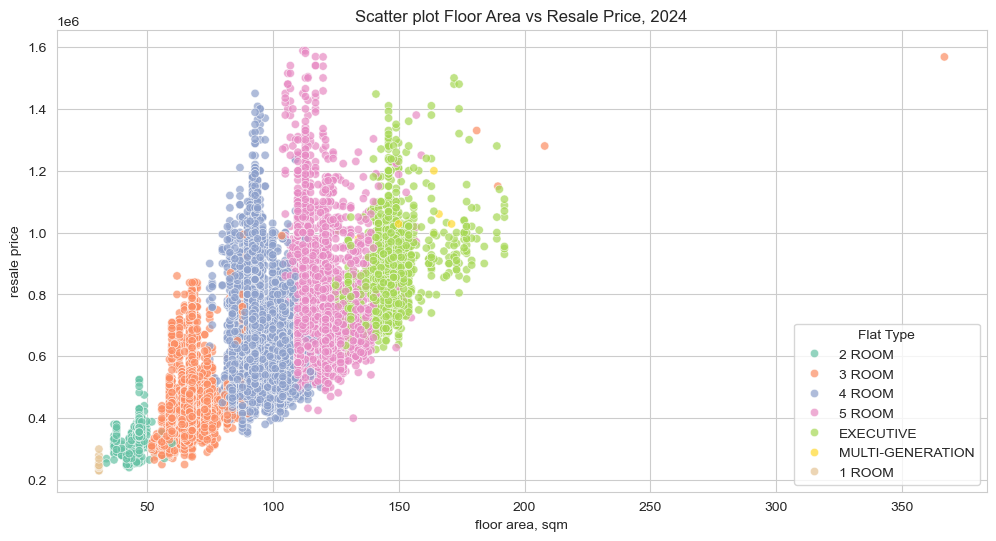

In [31]:
# the larger the floor area, the higher the resale price
plt.figure(figsize=(12,6), dpi=100)
sns.scatterplot(data=df2, x='floor_area_sqm', y='resale_price', hue='flat_type', palette='Set2', alpha=0.7)
plt.title('Scatter plot Floor Area vs Resale Price, 2024')
plt.xlabel('floor area, sqm')
plt.ylabel('resale price')
plt.legend(title='Flat Type', loc='lower right');

C:\Users\miche\AppData\Local\Temp\ipykernel_1284\1373446029.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, y='town', x='resale_price', palette='hls', ci=None)
C:\Users\miche\AppData\Local\Temp\ipykernel_1284\1373446029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, y='town', x='resale_price', palette='hls', ci=None)


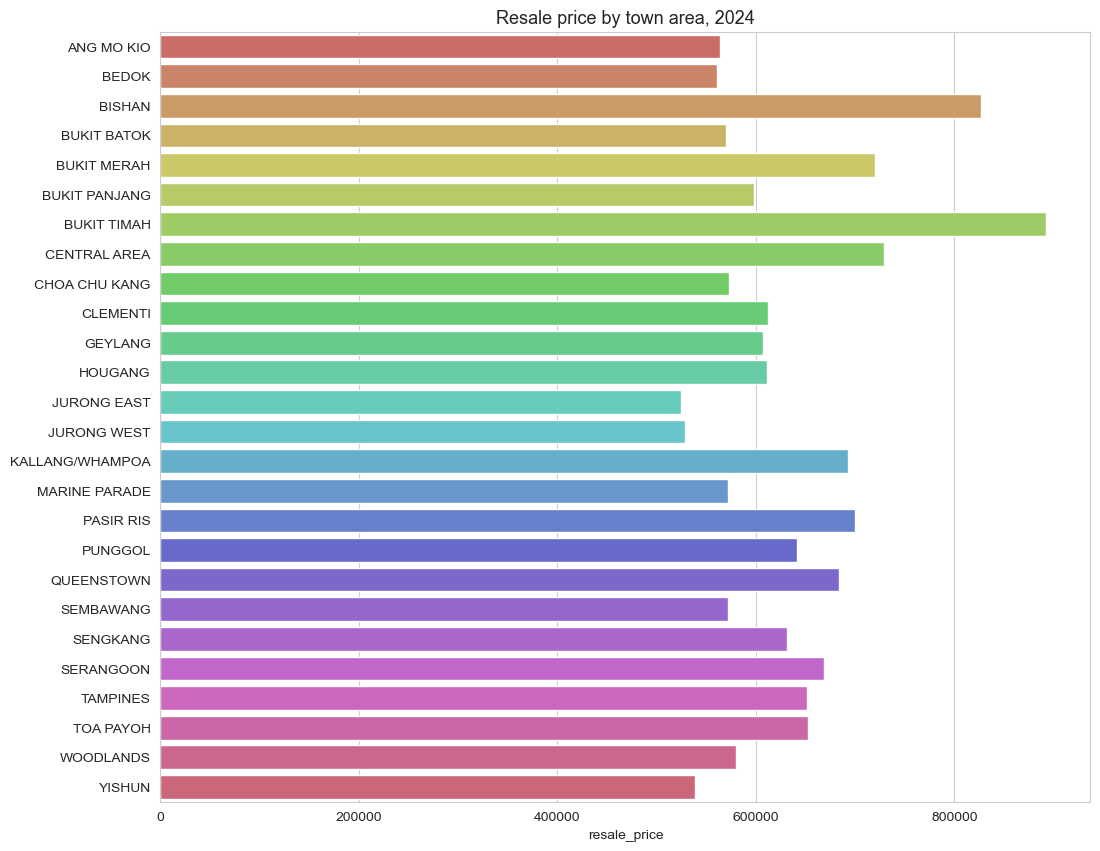

In [32]:
plt.figure(figsize=(12,10), dpi=100)
sns.barplot(data=df2, y='town', x='resale_price', palette='hls', ci=None)
plt.title('Resale price by town area, 2024', fontsize=13)
plt.ylabel('');

In [33]:
# HDB Resale flats around Bukit Timah are the most expensive, Bishan 
pd.DataFrame(df2.groupby('town')['resale_price'].median().sort_values(ascending=False))

,resale_price
town,
BUKIT TIMAH,899000.0
BISHAN,800888.0
BUKIT MERAH,756888.0
KALLANG/WHAMPOA,688888.0
PASIR RIS,685000.0
QUEENSTOWN,675000.0
TAMPINES,640000.0
PUNGGOL,639944.0
SERANGOON,629000.0


In [34]:
# Type S2 & S1 are the most expensive
pd.DataFrame(df2.groupby('flat_model')['resale_price'].median().sort_values(ascending=False))

,resale_price
flat_model,
Type S2,1450000.0
Type S1,1325000.0
Premium Apartment Loft,1225940.0
Multi Generation,1028000.0
Terrace,950000.0
Improved-Maisonette,913888.0
Model A-Maisonette,908000.0
Maisonette,898999.5
Adjoined flat,875000.0


In [35]:
# to explore resale flat area by towne area
df3 = df2[df2['town']=='JURONG EAST']

In [36]:
print("Resale HDB price, Jurong East")
pd.DataFrame(df3.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

Resale HDB price, Jurong East


,resale_price
flat_type,
EXECUTIVE,830000.0
5 ROOM,655000.0
4 ROOM,505000.0
3 ROOM,388000.0
2 ROOM,330000.0


In [37]:
df4 = df2[df2['town']=='CENTRAL AREA']

In [38]:
print("Resale HDB price, Central")
pd.DataFrame(df4.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

Resale HDB price, Central


,resale_price
flat_type,
5 ROOM,1400000.0
4 ROOM,768000.0
3 ROOM,499444.0
2 ROOM,296500.0


In [39]:
df6 = df2[df2['town']=='MARINE PARADE']

In [40]:
print("Resale HDB price, Marine Parade")
pd.DataFrame(df6.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

Resale HDB price, Marine Parade


,resale_price
flat_type,
5 ROOM,920000.0
4 ROOM,559000.0
3 ROOM,448000.0
2 ROOM,292500.0


In [41]:
df7 = df2[df2['town']=='BUKIT BATOK']

In [42]:
print("Resale HDB price, Bukit Batok")
pd.DataFrame(df7.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

Resale HDB price, Bukit Batok


,resale_price
flat_type,
EXECUTIVE,856500.0
5 ROOM,752000.0
4 ROOM,600000.0
3 ROOM,395000.0
2 ROOM,350000.0


In [43]:
df8 = df2[df2['town']=='JURONG WEST']

In [44]:
print("Resale HDB price, Jurong West")
pd.DataFrame(df8.groupby('flat_type')['resale_price'].median().sort_values(ascending=False))

Resale HDB price, Jurong West


,resale_price
flat_type,
EXECUTIVE,740000.0
5 ROOM,600000.0
4 ROOM,500000.0
3 ROOM,375000.0
2 ROOM,320000.0


In [45]:
# to remove unimportant variables before machine learning algorithm
df = df.drop(['street_name','block','year','Month'], axis=1)

In [46]:
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,11.0,44.0,Improved,1979,61.33,232000.0
1,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,1978,60.58,250000.0
2,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,1980,62.42,262000.0
3,ANG MO KIO,3 ROOM,5.0,68.0,New Generation,1980,62.08,265000.0
4,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,1980,62.42,265000.0


In [47]:
# to define X and y
X = df.drop('resale_price', axis=1)

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
y = df['resale_price']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
# testing set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# to scale the X train & test set
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [54]:
# to perform cross validation to determine which alpha value to use in Ridge regression
from sklearn.linear_model import RidgeCV

In [55]:
# perform cross validation to determine which alpha value to use in Ridge regression
# alpha = 0.1, 1.0, 10.0 are default values in Ridge CV model
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [56]:
# to use training set for the purpose of Hyper parameter tuning for Ridge regression
ridge_cv_model.fit(scaled_X_train, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [57]:
# in Ridge regression, alpha = 0.1 performs the best
ridge_cv_model.alpha_

0.1

In [58]:
# neg_mean_absolute_error, the higher the value the better
# to re-run model with the scoring metric
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [59]:
ridge_cv_model.fit(scaled_X_train, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,'neg_mean_absolute_error'
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [60]:
# scoring metric, alpha= 10 performs the best
ridge_cv_model.alpha_

10.0

In [61]:
ridge_cv_model.coef_[:10]

array([  28692.99719488,  100208.69077399,  435752.10631812,
       -361217.18833144,   -3388.1389831 ,   13053.57675743,
        -16999.48131232,   20710.42756694,  -24415.80929947,
         10240.16701918])

In [62]:
# import LASSSO CV for hyperparameter tuning to prevent overfitting
from sklearn.linear_model import LassoCV

In [63]:
# default values: eps= 0.01, n_alpha= 100, to increase no. of max iterations
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [64]:
# to fit Lasso CV onto the training data
lasso_cv_model.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1613: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


,eps,0.001
,n_alphas,100
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [65]:
# to find the best performing alpha value in Lasso Regression
lasso_cv_model.alpha_

104.76009173942391

In [66]:
# print coefficient in the Lasso Regression model
lasso_cv_model.coef_[:10]

array([  28831.34158846,  102894.28897239,  429207.5246443 ,
       -354474.8365875 ,   -2354.25133362,   13520.06783411,
        -16011.23402788,   21316.11746965,  -23427.19269596,
         10339.59431085])

In [67]:
# Elastic Net = L1 (Ridge) + L2 (LASSSO) regularization
from sklearn.linear_model import ElasticNetCV

In [68]:
# Default values, eps=0.001, n_alphas= 100
elastic_cv_model = ElasticNetCV(l1_ratio= [.1, .5,.7,.9, .95, .99, 1],eps = 0.001, n_alphas=100, max_iter= 1000000)

In [69]:
# train ElasticNet model on training data
elastic_cv_model.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1613: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


,l1_ratio,"[0.1, 0.5, ...]"
,eps,0.001
,n_alphas,100
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


In [70]:
elastic_cv_model.l1_ratio_

1.0

In [71]:
# Elastic Net Alpha = 104.395 (same as alpha regression), the model completely disregards Ridge regression
elastic_cv_model.alpha_

104.76009173942391

In [72]:
# Decision Tree regression
dt = DecisionTreeRegressor()

In [73]:
# fit decision tree into the training data
dt.fit(scaled_X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [74]:
# no overfitting/ under fitting observed in both training & test sets
print(f"Decision tree training set score: {dt.score(scaled_X_train, y_train):.3f}")
print(f"Decision tree testing set score: {dt.score(scaled_X_test, y_test):.3f}")

Decision tree training set score: 0.997
Decision tree testing set score: 0.926


In [75]:
# to predict on X test set
dt_test_pred = dt.predict(scaled_X_test)
dt_test_pred 

array([825000., 575000., 440000., ..., 548000., 255000., 538000.])

In [76]:
# to calculate Regression metrics for testing set, Decision Tree
dt_mae_test= mean_absolute_error(y_test, dt_test_pred)
dt_mse_test = mean_squared_error(y_test, dt_test_pred)
dt_rmse_test = root_mean_squared_error(y_test, dt_test_pred)
dt_r2_test = r2_score(y_test, dt_test_pred)

# to display metrics
print("Decision Tree Regression test metrics")
print(f"Testing MAE: {dt_mae_test:.3f}")
print(f"Testing MSE: {dt_mse_test: .3f}")
print(f"Testing RMSE: {dt_rmse_test: .3f}")
print(f"Testing R2: {dt_r2_test:.3f}")

Decision Tree Regression test metrics
Testing MAE: 32726.757
Testing MSE:  2350692040.577
Testing RMSE:  48483.936
Testing R2: 0.926


In [77]:
# to predict on X training set
dt_train_pred = dt.predict(scaled_X_train)
dt_train_pred

array([305000., 610000., 660000., ..., 315000., 540000., 270000.])

In [78]:
# Regression metrics for Decision Tree training set
dt_mae_train = mean_absolute_error(y_train, dt_train_pred)
dt_mse_train = mean_squared_error(y_train, dt_train_pred)
dt_rmse_train = root_mean_squared_error(y_train, dt_train_pred)
dt_r2_train = r2_score(y_train, dt_train_pred)

# Display decision tree training metrics
print("Decision Tree Reg Training metrics")
print(f"Training MAE: {dt_mae_train:.3f}")
print(f"Training MSE: {dt_mse_train:.3f}")
print(f"Training RMSE: {dt_rmse_train:.3f}")
print(f"Training R2: {dt_r2_train:.3f}")

Decision Tree Reg Training metrics
Training MAE: 2890.348
Training MSE: 78612945.286
Training RMSE: 8866.394
Training R2: 0.997


In [79]:
rf = RandomForestRegressor()

In [80]:
rf.fit(scaled_X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
# no over fitting or under fitting on the training & test set
print(f"Random Forest_training set score: {rf.score(scaled_X_train, y_train):.3f}")
print(f"Random Forest testing set score: {rf.score(scaled_X_test, y_test):.3f}")

Random Forest_training set score: 0.992
Random Forest testing set score: 0.957


In [82]:
# predict on the Random Forest training set, X train
rf_train_pred = rf.predict(scaled_X_train)
rf_train_pred

array([305117.76      , 616280.        , 660380.        , ...,
       318786.66666667, 551648.82666667, 254760.        ])

In [83]:
# Regression metrics for Random Forest training set
rf_mae_train = mean_absolute_error(y_train, rf_train_pred)
rf_mse_train = mean_squared_error(y_train, rf_train_pred)
rf_rmse_train = root_mean_squared_error(y_train, rf_train_pred)
rf_r2_train = r2_score(y_train, rf_train_pred)

# Display Random Forest training metrics
print("Random Forest Regression Training metrics")
print(f"Training MAE: {rf_mae_train:.3f}")
print(f"Training MSE: {rf_mse_train:.3f}")
print(f"Training RMSE: {rf_rmse_train:.3f}")
print(f"Training R2: {rf_r2_train:.3f}")

Random Forest Regression Training metrics
Training MAE: 10730.786
Training MSE: 244425008.491
Training RMSE: 15634.098
Training R2: 0.992


In [84]:
# to predict on Random Forest testing set
rf_test_pred = rf.predict(scaled_X_test)
rf_test_pred

array([810597.21333333, 584171.66      , 442076.76      , ...,
       594562.66666667, 251010.        , 535274.4       ])

In [130]:
# Regression metrics for Random Forest test set
rf_mae_test = mean_absolute_error(y_test, rf_test_pred)
rf_mse_test = mean_squared_error(y_test, rf_test_pred)
rf_rmse_test = root_mean_squared_error(y_test, rf_test_pred)
rf_r2_test = r2_score(y_test, rf_test_pred)

# Display Random Forest test metrics
print("Random Forest Regression Test metrics")
print(f"Testing MAE: {rf_mae_test:.3f}")
print(f"Testing MSE: {rf_mse_test:.3f}")
print(f"Testing RMSE: {rf_rmse_test:.3f}")
print(f"Testing R2: {rf_r2_test:.3f}")

Random Forest Regression Test metrics
Testing MAE: 25673.917
Testing MSE: 1355016270.729
Testing RMSE: 36810.546
Testing R2: 0.957


In [86]:
ada = AdaBoostRegressor()

In [87]:
# to fit AdaBoost model to training data
ada.fit(scaled_X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,None


In [88]:
# Underfitting is observed on both the training & testing set
print(f"AdaBoost training set score: {ada.score(scaled_X_train, y_train):.3f}")
print(f"AdaBoost testing set score: {ada.score(scaled_X_test, y_test):.3f}")

AdaBoost training set score: 0.180
AdaBoost testing set score: 0.192


In [89]:
# to predict on X testing set
ada_train_pred = elastic_cv_model.predict(scaled_X_train)
ada_train_pred

array([329415.71682957, 613721.33330835, 652768.13440249, ...,
       353966.79003568, 553033.61311737, 242111.39822957])

In [90]:
# Regression metrics for AdaBoost training set
ada_mae_train = mean_absolute_error(y_train, ada_train_pred)
ada_mse_train = mean_squared_error(y_train, ada_train_pred)
ada_rmse_train = root_mean_squared_error(y_train, ada_train_pred)
ada_r2_train = r2_score(y_train, ada_train_pred)

# Display AdaBoost training metrics
print("AdaBoost Regression Training metrics")
print(f"Training MAE: {ada_mae_train:.3f}")
print(f"Training MSE: {ada_mse_train:.3f}")
print(f"Training RMSE: {ada_rmse_train:.3f}")
print(f"Training R2: {ada_r2_train:.3f}")

AdaBoost Regression Training metrics
Training MAE: 50909.684
Training MSE: 4330282082.006
Training RMSE: 65804.879
Training R2: 0.861


In [91]:
# to predict on X training set
ada_test_pred = elastic_cv_model.predict(scaled_X_test)
ada_test_pred

array([793578.91213132, 583640.36119386, 401500.59789603, ...,
       591239.01070196, 144867.62425215, 575596.44129282])

In [131]:
# Regression metrics for AdaBoost test set
ada_mae_test = mean_absolute_error(y_test, ada_test_pred)
ada_mse_test = mean_squared_error(y_test, ada_test_pred)
ada_rmse_test = root_mean_squared_error(y_test, ada_test_pred)
ada_r2_test = r2_score(y_test, ada_test_pred)

# Display Adaboost test metrics
print("AdaBoost Regression Test metrics")
print(f"Testing MAE: {ada_mae_test:.3f}")
print(f"Testing MSE: {ada_mse_test:.3f}")
print(f"Testing RMSE: {ada_rmse_test:.3f}")
print(f"Testing R2: {ada_r2_test:.3f}")

AdaBoost Regression Test metrics
Testing MAE: 50847.030
Testing MSE: 4353103494.314
Testing RMSE: 65978.053
Testing R2: 0.862


In [93]:
gbr = GradientBoostingRegressor()

In [94]:
gbr.fit(scaled_X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [95]:
print(f"Gradient Boost training set score: {gbr.score(scaled_X_train, y_train):.3f}")
print(f"Gradient Boost testing set score: {gbr.score(scaled_X_test, y_test):.3f}")

Gradient Boost training set score: 0.789
Gradient Boost testing set score: 0.788


In [96]:
# to predict on X training data
gbr_train_pred = gbr.predict(scaled_X_train)
gbr_train_pred

array([321889.67244543, 560463.03096799, 584125.87408701, ...,
       311057.39779801, 538625.24861124, 261369.97480278])

In [97]:
# Regression metrics for Gradient Boost training set
gbr_mae_train = mean_absolute_error(y_train, gbr_train_pred)
gbr_mse_train = mean_squared_error(y_train, gbr_train_pred)
gbr_rmse_train = root_mean_squared_error(y_train, gbr_train_pred)
gbr_r2_train = r2_score(y_train, gbr_train_pred)

# Display Gradient Boost training metrics
print("Gradient Boost Regression Training metrics")
print(f"Training MAE: {gbr_mae_train:.3f}")
print(f"Training MSE: {gbr_mse_train:.3f}")
print(f"Training RMSE: {gbr_rmse_train:.3f}")
print(f"Training R2: {gbr_r2_train:.3f}")

Gradient Boost Regression Training metrics
Training MAE: 62643.444
Training MSE: 6578444114.968
Training RMSE: 81107.608
Training R2: 0.789


In [98]:
# to predict on X testing data
gbr_test_pred = gbr.predict(scaled_X_test)
gbr_test_pred

array([802999.54161985, 586784.34190849, 435651.77063514, ...,
       586082.54468641, 260136.81978075, 593273.24191296])

In [132]:
# Regression metrics for Gradient Boost test set
gbr_mae_test = mean_absolute_error(y_test, gbr_test_pred)
gbr_mse_test = mean_squared_error(y_test, gbr_test_pred)
gbr_rmse_test = root_mean_squared_error(y_test, gbr_test_pred)
gbr_r2_test = r2_score(y_test, gbr_test_pred)

# Display Gradient Boost test metrics
print("Gradient Boost Regression Test metrics")
print(f"Testing MAE: {gbr_mae_test:.3f}")
print(f"Testing MSE: {gbr_mse_test:.3f}")
print(f"Testing RMSE: {gbr_rmse_test:.3f}")
print(f"Testing R2: {gbr_r2_test:.3f}")

Gradient Boost Regression Test metrics
Testing MAE: 63035.076
Testing MSE: 6681250075.614
Testing RMSE: 81738.914
Testing R2: 0.788


In [100]:
xgb = XGBRegressor()

In [101]:
xgb.fit(scaled_X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [102]:
print(f"XGBoost training set score: {xgb.score(scaled_X_train, y_train):.3f}")
print(f"XGBoost testing set score: {xgb.score(scaled_X_test, y_test):.3f}")

XGBoost training set score: 0.949
XGBoost testing set score: 0.946


In [103]:
# to predict on X training data
xgb_train_pred = xgb.predict(scaled_X_train)
xgb_train_pred

array([296310.22, 634346.94, 644558.94, ..., 331730.75, 582282.  ,
       273241.8 ], dtype=float32)

In [104]:
# Regression metrics for XGBoost training set
xgb_mae_train = mean_absolute_error(y_train, xgb_train_pred)
xgb_mse_train = mean_squared_error(y_train, xgb_train_pred)
xgb_rmse_train = root_mean_squared_error(y_train, xgb_train_pred)
xgb_r2_train = r2_score(y_train, xgb_train_pred)

# Display XGBoost training metrics
print("XGBoost Regression Training metrics")
print(f"Training MAE: {xgb_mae_train:.3f}")
print(f"Training MSE: {xgb_mse_train:.3f}")
print(f"Training RMSE: {xgb_rmse_train:.3f}")
print(f"Training R2: {xgb_r2_train:.3f}")

XGBoost Regression Training metrics
Training MAE: 28827.191
Training MSE: 1583357165.200
Training RMSE: 39791.421
Training R2: 0.949


In [105]:
xgb_test_pred = xgb.predict(scaled_X_test)
xgb_test_pred

array([804880.3 , 578384.7 , 420872.2 , ..., 593211.  , 218812.92,
       555237.5 ], dtype=float32)

In [133]:
# Regression metrics for XGBoost test set
xgb_mae_test = mean_absolute_error(y_test, xgb_test_pred)
xgb_mse_test = mean_squared_error(y_test, xgb_test_pred)
xgb_rmse_test = root_mean_squared_error(y_test, xgb_test_pred)
xgb_r2_test = r2_score(y_test, xgb_test_pred)

# Display XGBoost test metrics
print("Gradient Boost Regression Test metrics")
print(f"Testing MAE: {xgb_mae_test:.3f}")
print(f"Testing MSE: {xgb_mse_test:.3f}")
print(f"Testing RMSE: {xgb_rmse_test:.3f}")
print(f"Testing R2: {xgb_r2_test:.3f}")

Gradient Boost Regression Test metrics
Testing MAE: 29852.567
Testing MSE: 1706452932.308
Testing RMSE: 41309.235
Testing R2: 0.946


In [107]:
svr = SVR()

In [108]:
svr.fit(scaled_X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [109]:
# underfitting is observed on both training and testing data
print(f"Support Vector machine training set score: {svr.score(scaled_X_train, y_train):.3f}")
print(f"Support Vector machine testing set score: {svr.score(scaled_X_test, y_test):.3f}")

Support Vector machine training set score: -0.010
Support Vector machine testing set score: -0.012


In [110]:
svr_train_pred = elastic_cv_model.predict(scaled_X_train)
svr_train_pred

array([329415.71682957, 613721.33330835, 652768.13440249, ...,
       353966.79003568, 553033.61311737, 242111.39822957])

In [111]:
# Regression metrics for Support Vector regression training set
svr_mae_train = mean_absolute_error(y_train, svr_train_pred)
svr_mse_train = mean_squared_error(y_train, svr_train_pred)
svr_rmse_train = root_mean_squared_error(y_train, svr_train_pred)
svr_r2_train = r2_score(y_train, svr_train_pred)

# Display Support Vector training metrics
print("Support Vector Regression Training metrics")
print(f"Training MAE: {svr_mae_train:.3f}")
print(f"Training MSE: {svr_mse_train:.3f}")
print(f"Training RMSE: {svr_rmse_train:.3f}")
print(f"Training R2: {svr_r2_train:.3f}")

Support Vector Regression Training metrics
Training MAE: 50909.684
Training MSE: 4330282082.006
Training RMSE: 65804.879
Training R2: 0.861


In [112]:
svr_test_pred = elastic_cv_model.predict(scaled_X_test)
svr_test_pred

array([793578.91213132, 583640.36119386, 401500.59789603, ...,
       591239.01070196, 144867.62425215, 575596.44129282])

In [134]:
# Regression metrics for Support Vector test set
svr_mae_test = mean_absolute_error(y_test, svr_test_pred)
svr_mse_test = mean_squared_error(y_test, svr_test_pred)
svr_rmse_test = root_mean_squared_error(y_test, svr_test_pred)
svr_r2_test = r2_score(y_test, svr_test_pred)

# Display Support Vector test metrics
print("Support Vector Regression Test metrics")
print(f"Testing MAE: {svr_mae_test:.3f}")
print(f"Testing MSE: {svr_mse_test:.3f}")
print(f"Testing RMSE: {svr_rmse_test:.3f}")
print(f"Testing R2: {svr_r2_test:.3f}")

Support Vector Regression Test metrics
Testing MAE: 50847.030
Testing MSE: 4353103494.314
Testing RMSE: 65978.053
Testing R2: 0.862


In [114]:
knn = KNeighborsRegressor()

In [115]:
knn.fit(scaled_X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [116]:
print(f"KNN Regressor training set score: {knn.score(scaled_X_train, y_train):.3f}")
print(f"KNN Regressor machine testing set score: {knn.score(scaled_X_test, y_test):.3f}")

KNN Regressor training set score: 0.959
KNN Regressor machine testing set score: 0.936


In [117]:
knn_train_pred = knn.predict(scaled_X_train)
knn_train_pred

array([310760., 623000., 663000., ..., 319000., 555200., 280000.])

In [118]:
# Regression metrics for KNN regression training set
knn_mae_train = mean_absolute_error(y_train, knn_train_pred)
knn_mse_train = mean_squared_error(y_train, knn_train_pred)
knn_rmse_train = root_mean_squared_error(y_train, knn_train_pred)
knn_r2_train = r2_score(y_train, knn_train_pred)

# Display KNN training metrics
print("KNN Regression Training metrics")
print(f"Training MAE: {knn_mae_train:.3f}")
print(f"Training MSE: {knn_mse_train:.3f}")
print(f"Training RMSE: {knn_rmse_train:.3f}")
print(f"Training R2: {knn_r2_train:.3f}")

KNN Regression Training metrics
Training MAE: 24136.661
Training MSE: 1265332853.456
Training RMSE: 35571.517
Training R2: 0.959


In [119]:
knn_test_pred = knn.predict(scaled_X_test)
knn_test_pred

array([783600. , 591400. , 460600. , ..., 637777.6, 233600. , 529977.6])

In [135]:
# Regression metrics for KNN test set
knn_mae_test = mean_absolute_error(y_test, knn_test_pred)
knn_mse_test = mean_squared_error(y_test, knn_test_pred)
knn_rmse_test = root_mean_squared_error(y_test, knn_test_pred)
knn_r2_test= r2_score(y_test, knn_test_pred)

# Display KNN test metrics
print("KNN Regression Test metrics")
print(f"Testing MAE: {knn_mae_test:.3f}")
print(f"Testing MSE: {knn_mse_test:.3f}")
print(f"Testing RMSE: {knn_rmse_test:.3f}")
print(f"Testing R2: {knn_r2_test:.3f}")

KNN Regression Test metrics
Testing MAE: 30777.303
Testing MSE: 2021792566.262
Testing RMSE: 44964.348
Testing R2: 0.936


In [123]:
lr = LinearRegression()

In [124]:
lr.fit(scaled_X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [125]:
print(f"Linear Regressor training set score: {lr.score(scaled_X_train, y_train):.3f}")
print(f"Linear Regressor machine testing set score: {lr.score(scaled_X_test, y_test):.3f}")

Linear Regressor training set score: 0.861
Linear Regressor machine testing set score: 0.862


In [126]:
lr_train_pred = lr.predict(scaled_X_train)
lr_train_pred

array([329256.32220301, 614944.16534267, 655717.66685598, ...,
       358914.22126016, 555559.0856798 , 208475.56960109])

In [127]:
# Regression metrics for linear regression training set
lr_mae_train = mean_absolute_error(y_train, lr_train_pred)
lr_mse_train = mean_squared_error(y_train, lr_train_pred)
lr_rmse_train = root_mean_squared_error(y_train, lr_train_pred)
lr_r2_train = r2_score(y_train, lr_train_pred)

# Display Linear Regression training metrics
print("Linear Regression Training metrics")
print(f"Training MAE: {lr_mae_train:.3f}")
print(f"Training MSE: {lr_mse_train:.3f}")
print(f"Training RMSE: {lr_rmse_train:.3f}")
print(f"Training R2: {lr_r2_train:.3f}")

Linear Regression Training metrics
Training MAE: 50921.960
Training MSE: 4324579810.892
Training RMSE: 65761.537
Training R2: 0.861


In [128]:
lr_test_pred = lr.predict(scaled_X_test)
lr_test_pred

array([792156.40253208, 582502.54011237, 400516.49053622, ...,
       592023.39260366, 142506.6453181 , 576009.55784964])

In [136]:
# Regression metrics for Linear Regression test set
lr_mae_test = mean_absolute_error(y_test, lr_test_pred)
lr_mse_test = mean_squared_error(y_test, lr_test_pred)
lr_rmse_test = root_mean_squared_error(y_test, lr_test_pred)
lr_r2_test= r2_score(y_test, lr_test_pred)

# Display Linear regression test metrics
print("Linear Regression Test metrics")
print(f"Testing MAE: {lr_mae_test:.3f}")
print(f"Testing MSE: {lr_mse_test:.3f}")
print(f"Testing RMSE: {lr_rmse_test:.3f}")
print(f"Testing R2: {lr_r2_test:.3f}")

Linear Regression Test metrics
Testing MAE: 50880.970
Testing MSE: 4348495165.284
Testing RMSE: 65943.121
Testing R2: 0.862


In [137]:
# Random Forest RMSE test score = 36810.546, smallest error among all the regression trees

In [138]:
rf.feature_importances_

array([9.47651087e-02, 4.09492210e-01, 1.46422202e-01, 1.03997163e-01,
       6.14654966e-03, 1.59590974e-02, 3.62579644e-03, 2.73366342e-02,
       6.12666062e-03, 5.38824317e-03, 1.01112058e-02, 7.07166955e-03,
       5.99914901e-03, 1.16620669e-02, 1.82901119e-03, 4.80539475e-03,
       7.19814935e-03, 1.30746013e-02, 3.30842512e-03, 1.40866227e-03,
       1.94603082e-03, 1.89417987e-02, 2.41920960e-03, 1.19540542e-02,
       4.22169114e-03, 3.95591665e-03, 1.13912545e-02, 7.73526458e-03,
       2.26371675e-03, 3.41493391e-03, 4.86560530e-03, 1.37539770e-02,
       1.56820309e-03, 3.01335088e-03, 1.95863121e-05, 2.98330276e-06,
       1.54841782e-04, 2.85388043e-04, 1.19480626e-02, 2.12163502e-03,
       5.10161767e-05, 2.69558887e-04, 2.93237699e-03, 1.97321877e-04,
       8.38331447e-05, 2.67663161e-05, 4.01023308e-04, 1.98412701e-03,
       9.10920520e-05, 2.24413634e-05, 1.19744355e-04, 9.84394517e-04,
       8.57177503e-04, 1.55297671e-04, 1.18324430e-04])

In [142]:
pd.DataFrame(data= rf.feature_importances_, index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
floor_area_sqm,0.409492
lease_commence_date,0.146422
remaining_lease,0.103997
storey_range,0.094765
town_BUKIT MERAH,0.027337
town_QUEENSTOWN,0.018942
town_BISHAN,0.015959
flat_type_4 ROOM,0.013754
town_KALLANG/WHAMPOA,0.013075
town_SENGKANG,0.011954


In [146]:
# read into a new df
rf_feat = pd.DataFrame(data= rf.feature_importances_, index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [147]:
# to filter of varible with > 0.004 variable importance
rf_imp = rf_feat[rf_feat['Importance'] > 0.00008]

In [148]:
rf_imp

,Importance
floor_area_sqm,0.409492
lease_commence_date,0.146422
remaining_lease,0.103997
storey_range,0.094765
town_BUKIT MERAH,0.027337
town_QUEENSTOWN,0.018942
town_BISHAN,0.015959
flat_type_4 ROOM,0.013754
town_KALLANG/WHAMPOA,0.013075
town_SENGKANG,0.011954


C:\Users\miche\AppData\Local\Temp\ipykernel_1284\4273921446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_imp, y=rf_imp.index, x='Importance', palette='husl')


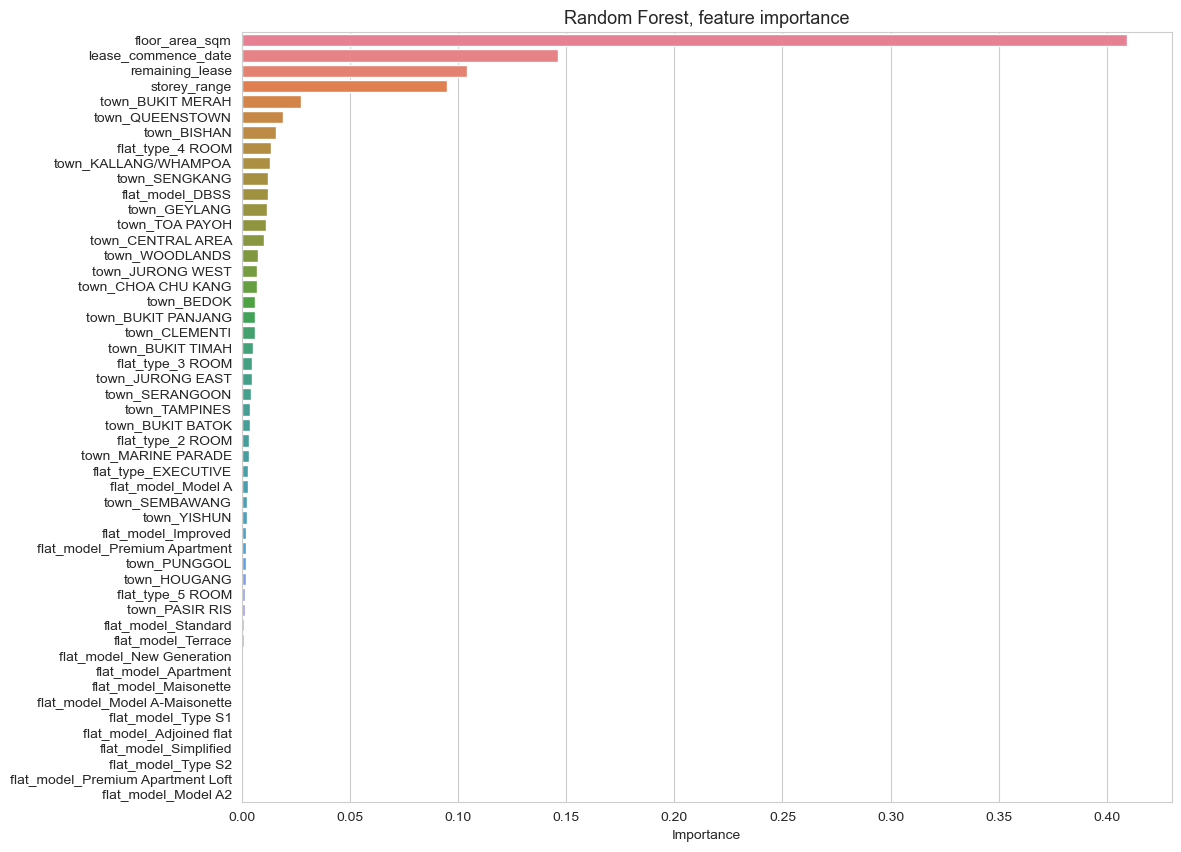

In [151]:
plt.figure(figsize=(12,10), dpi=100)
sns.barplot(data=rf_imp, y=rf_imp.index, x='Importance', palette='husl')
plt.title('Random Forest, feature importance', fontsize=13)
plt.ylabel('');